## Project Report

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Data Cleaning/ Preprocessing

In [2]:
# delete unnecessary columns
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")
pd.set_option('display.max_columns', None)
del df['occupation']
del df['education']
del df['car']
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
# Bar Attribute: changing NaN to median of whatever data we have
Bar = df["Bar"].tolist()

frequency = df.Bar.value_counts()
frequency
frequency_list = list(frequency)

middle = sum(frequency_list) / 2
middle
 # median : less than 1  catagory
df['Bar'] = df['Bar'].fillna("less1")

In [4]:
# CarryAway Attribute: changing NaN to median of whatever data we have
CarryAway = df["CarryAway"].tolist()

frequency = df.CarryAway.value_counts()
frequency
frequency_list = [153,1856,4672,4258,1594]
middle = sum(frequency_list) / 2
middle
 # median : 1-3 catagory
df['CarryAway'] = df['CarryAway'].fillna("1~3")

In [5]:
# RestaurantLessThan20 Attribute: changing NaN to median of whatever data we have
RestaurantLessThan20 = df["RestaurantLessThan20"].tolist()

frequency = df.RestaurantLessThan20.value_counts()
frequency
frequency_list = [220,2093,5376,3580,1285]
middle = sum(frequency_list) / 2
middle
 # median : 1-3 catagory
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].fillna("1~3")

In [6]:
 # CoffeeHouse Attribute: changing NaN to median of whatever data we have
CoffeeHouse  = df["CoffeeHouse"].tolist()

frequency = df.CoffeeHouse.value_counts()
frequency
frequency_list = [2962, 3385, 3225, 1784, 1111]

middle = sum(frequency_list) / 2
middle
 # median : less than 1  catagory
df['CoffeeHouse'] = df['CoffeeHouse'].fillna("less1")

In [7]:
# Restaurant20To50 Attribute: changing NaN to median of whatever data we have
Restaurant20To50 = df["Restaurant20To50"].tolist()

frequency = df.Restaurant20To50.value_counts()
frequency

frequency_list = [2136,6077,3290,728,264]

middle = sum(frequency_list) / 2
middle
 # median : less1 catagory
df['Restaurant20To50'] = df['Restaurant20To50'].fillna("less1")

In [8]:
# change categorical values to numbers 

newData = df

#destination
newData['destination'] = newData['destination'].replace(['No Urgent Place'], 1)
newData['destination'] = newData['destination'].replace(['Home'], 2)
newData['destination'] = newData['destination'].replace(['Work'], 3)

#passanger
newData['passanger'] = newData['passanger'].replace(['Alone'], 1)
newData['passanger'] = newData['passanger'].replace(['Kid(s)'], 2)
newData['passanger'] = newData['passanger'].replace(['Friend(s)'], 3)
newData['passanger'] = newData['passanger'].replace(['Partner'], 4)

#weather
newData['weather'] = newData['weather'].replace(['Sunny'], 1)
newData['weather'] = newData['weather'].replace(['Rainy'], 2)
newData['weather'] = newData['weather'].replace(['Snowy'], 3)

#time
newData['time'] = newData['time'].replace(['7AM'], 1)
newData['time'] = newData['time'].replace(['10AM'], 2)
newData['time'] = newData['time'].replace(['2PM'], 3)
newData['time'] = newData['time'].replace(['6PM'], 4)
newData['time'] = newData['time'].replace(['10PM'], 5)

#coupon
newData['coupon'] = newData['coupon'].replace(['Bar'], 1)
newData['coupon'] = newData['coupon'].replace(['Coffee House'], 2)
newData['coupon'] = newData['coupon'].replace(['Carry out & Take away'], 3)
newData['coupon'] = newData['coupon'].replace(['Restaurant(<20)'], 4)
newData['coupon'] = newData['coupon'].replace(['Restaurant(20-50)'], 5)

#gender
newData['gender'] = newData['gender'].replace(['Female'], 1)
newData['gender'] = newData['gender'].replace(['Male'], 0)

#expiration
newData['expiration'] = newData['expiration'].replace(['1d'], 1)
newData['expiration'] = newData['expiration'].replace(['2h'], 2)

#maritalStatus
newData['maritalStatus'] = newData['maritalStatus'].replace(['Married partner'], 1)
newData['maritalStatus'] = newData['maritalStatus'].replace(['Single'], 2)
newData['maritalStatus'] = newData['maritalStatus'].replace(['Unmarried partner'], 3)
newData['maritalStatus'] = newData['maritalStatus'].replace(['Divorced'], 4)
newData['maritalStatus'] = newData['maritalStatus'].replace(['Widowed'], 5)

#income
newData['income'] = newData['income'].replace(['Less than $12500'], 1)
newData['income'] = newData['income'].replace(['$12500 - $24999'], 2)
newData['income'] = newData['income'].replace(['$25000 - $37499'], 3)
newData['income'] = newData['income'].replace(['$37500 - $49999'], 4)
newData['income'] = newData['income'].replace(['$50000 - $62499'], 5)
newData['income'] = newData['income'].replace(['$62500 - $74999'], 6)
newData['income'] = newData['income'].replace(['$75000 - $87499'], 7)
newData['income'] = newData['income'].replace(['$87500 - $99999'], 8)
newData['income'] = newData['income'].replace(['$100000 or More'], 9)

#Bar
newData['Bar'] = newData['Bar'].replace(['never'], 1)
newData['Bar'] = newData['Bar'].replace(['less1'], 2)
newData['Bar'] = newData['Bar'].replace(['1~3'], 3)
newData['Bar'] = newData['Bar'].replace(['4~8'], 4)
newData['Bar'] = newData['Bar'].replace(['gt8'], 5)

#CoffeeHouse
newData['CoffeeHouse'] = newData['CoffeeHouse'].replace(['never'], 1)
newData['CoffeeHouse'] = newData['CoffeeHouse'].replace(['less1'], 2)
newData['CoffeeHouse'] = newData['CoffeeHouse'].replace(['1~3'], 3)
newData['CoffeeHouse'] = newData['CoffeeHouse'].replace(['4~8'], 4)
newData['CoffeeHouse'] = newData['CoffeeHouse'].replace(['gt8'], 5)

#CarryAway
newData['CarryAway'] = newData['CarryAway'].replace(['never'], 1)
newData['CarryAway'] = newData['CarryAway'].replace(['less1'], 2)
newData['CarryAway'] = newData['CarryAway'].replace(['1~3'], 3)
newData['CarryAway'] = newData['CarryAway'].replace(['4~8'], 4)
newData['CarryAway'] = newData['CarryAway'].replace(['gt8'], 5)

#RestaurantLessThan20
newData['RestaurantLessThan20'] = newData['RestaurantLessThan20'].replace(['never'], 1)
newData['RestaurantLessThan20'] = newData['RestaurantLessThan20'].replace(['less1'], 2)
newData['RestaurantLessThan20'] = newData['RestaurantLessThan20'].replace(['1~3'], 3)
newData['RestaurantLessThan20'] = newData['RestaurantLessThan20'].replace(['4~8'], 4)
newData['RestaurantLessThan20'] = newData['RestaurantLessThan20'].replace(['gt8'], 5)

#Restaurant20To50
newData['Restaurant20To50'] = newData['Restaurant20To50'].replace(['never'], 1)
newData['Restaurant20To50'] = newData['Restaurant20To50'].replace(['less1'], 2)
newData['Restaurant20To50'] = newData['Restaurant20To50'].replace(['1~3'], 3)
newData['Restaurant20To50'] = newData['Restaurant20To50'].replace(['4~8'], 4)
newData['Restaurant20To50'] = newData['Restaurant20To50'].replace(['gt8'], 5)

#age
newData['age'] = newData['age'].replace(['below21'], 1)
newData['age'] = newData['age'].replace(['21'], 2)
newData['age'] = newData['age'].replace(['26'], 3)
newData['age'] = newData['age'].replace(['31'], 4)
newData['age'] = newData['age'].replace(['36'], 5)
newData['age'] = newData['age'].replace(['41'], 6)
newData['age'] = newData['age'].replace(['46'], 7)
newData['age'] = newData['age'].replace(['50plus'], 8)

newData.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,1,1,55,3,4,1,1,2,3,1,4,1,1,3,4,3,1,0,0,0,1,1
1,1,3,1,80,2,2,2,1,2,3,1,4,1,1,3,4,3,1,0,0,0,1,0
2,1,3,1,80,2,3,2,1,2,3,1,4,1,1,3,4,3,1,1,0,0,1,1
3,1,3,1,80,3,2,2,1,2,3,1,4,1,1,3,4,3,1,1,0,0,1,0
4,1,3,1,80,3,2,1,1,2,3,1,4,1,1,3,4,3,1,1,0,0,1,0


To clean the data, we first deleted columns that we deemed uneccessary for the model, which were education, occupation, and car. Then, To deal with the NaNs in the CarryAway, Bar, CoffeeHouse, Restaurant kess than $20 and Restaurant $20-50 catagories, we decided to replace them with the median catagory, as the categories were able to be ordered in this way: never, less than 1, 1-3, 4-8, greater that 8. For columns that had catagorical data, we replaced them with numerical values in order to be able to run the KNN model. 

## EDA

array([<AxesSubplot:ylabel='0'>, <AxesSubplot:ylabel='1'>], dtype=object)

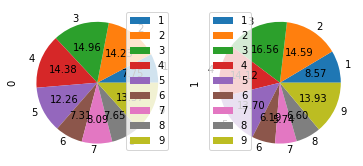

In [9]:
income_yes = pd.crosstab(newData.income, newData.Y)
income_yes.plot.pie(autopct="%.2f", subplots=True)

In [10]:
"In order to see how income plays a role on if the subject accepts the coupon, we can group together the counts of the \'income' and the \'Y' columns in order to see which incomes accept/reject more. From the pie chart, we can see that in the True graph (1), the highest percentage was given to group 3 @ 16.56%. This means that the group having an income of $25000 - $37499 had the highest acceptance rate."

"In order to see how income plays a role on if the subject accepts the coupon, we can group together the counts of the 'income' and the 'Y' columns in order to see which incomes accept/reject more. From the pie chart, we can see that in the True graph (1), the highest percentage was given to group 3 @ 16.56%. This means that the group having an income of $25000 - $37499 had the highest acceptance rate."

array([<AxesSubplot:ylabel='0'>, <AxesSubplot:ylabel='1'>], dtype=object)

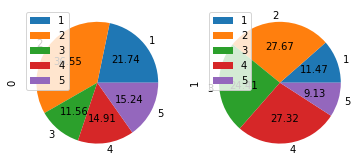

In [11]:
coupon_yes = pd.crosstab(newData.coupon, newData.Y)
coupon_yes.plot.pie(autopct="%.2f", subplots=True)

In [12]:
"This pie chart represnts how many subjects took the coupon based on what type of coupon it was. We can see that in the True graph (1), the highest percentage was given group 2 @ 27.67%. This means that the Coffee House coupon was the most popular, followed by Restaurants<$20."

'This pie chart represnts how many subjects took the coupon based on what type of coupon it was. We can see that in the True graph (1), the highest percentage was given group 2 @ 27.67%. This means that the Coffee House coupon was the most popular, followed by Restaurants<$20.'

## K Means Clustering

The maximum number of neighbor is 113


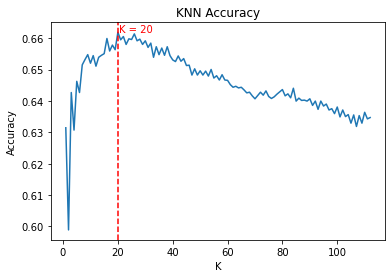

In [13]:
# independent features

X = newData[['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']]

# dependent feature
Y = newData['Y']

#finding K

k_values = range(1, 113)
accuracies = []

X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.25, shuffle=True)

print('The maximum number of neighbor is 113')

# Calculate model performance for each K

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    try:
        cv_performance = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy', error_score='raise')
        accuracies.append(cv_performance.mean())
    except Exception as e:
        print(f"Fit failed for k={k}. Exception: {str(e)}")
        
        
#elbow curve 

plt.plot(k_values, accuracies)
plt.xlabel('K')
plt.ylabel('Accuracy')

max_accuracy = max(accuracies)
max_index = accuracies.index(max_accuracy)
best_k = k_values[max_index]

plt.axvline(x=best_k, color='r', linestyle='--', label='Best K')
plt.text(best_k + 0.5, max_accuracy, f'K = {best_k}', color='r')
plt.title('KNN Accuracy')
plt.show()


In [17]:
print(f"The highest accuracy is {max_accuracy} achieved at k = {best_k}")

The highest accuracy is 0.6619358000787953 achieved at k = 20


In [18]:
# train the model using the entire dataset

# Training the K-NN model on the Training set
knn = KNeighborsClassifier(n_neighbors = 22, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = knn.predict(X_test)

# accuracy of results
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6818038473667613


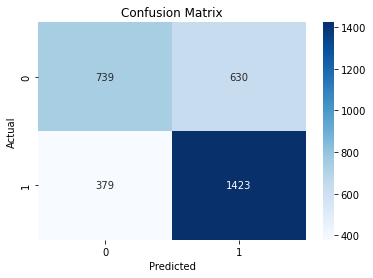

In [19]:
# confusion matrix
confusion_mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

To perform the k-means-model, it was necessary to first find the value for K which we would use. In order to do this, we created an elbow curve, using a range of 1 to 113, which was the square root of the number of observations of our model, and scoring each model created by its accuracy. We then found the model with the highest accuracy, and used that model for classification. We then created a confusion matrix to determine the number of true positives and negatives, and false positives and negatives.